In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [19]:
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)
df[data.target_names[0]] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
X = df[['sepal length (cm)','sepal width (cm)']].values


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [73]:
km = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    max_iter = 300,
    random_state = 42
)
km.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [74]:
labels = km.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [75]:
df['cluster'] = labels

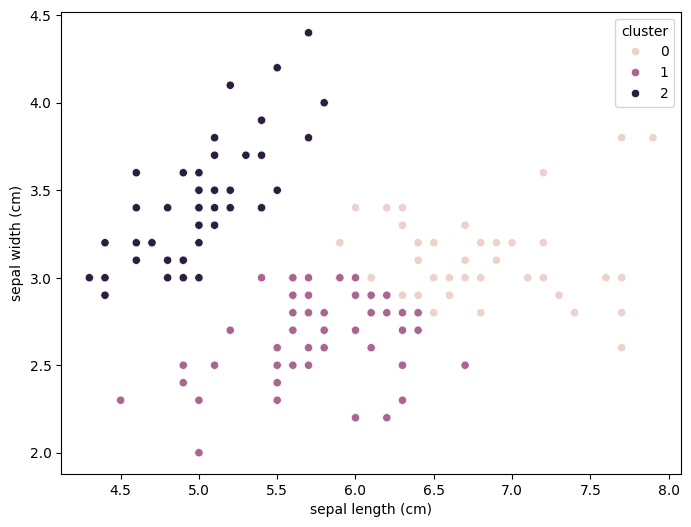

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x=df['sepal length (cm)'],y=df['sepal width (cm)'],hue=df['cluster'])
plt.show()

In [64]:
wcss = []
for i in range(1,11):
    km = KMeans(
    n_clusters = i,
    init = 'k-means++',
    max_iter = 300,
    random_state = 42
    )
    km.fit(X_scaled)
    wcss.append(km.inertia_)

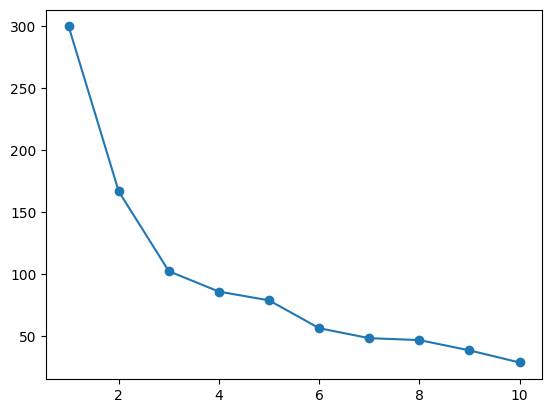

In [65]:
plt.plot(range(1,11),wcss,marker='o')

In [76]:
score = silhouette_score(X_scaled,labels)
score

0.43585870335071936